#**Loan Approval Analysis: Factors Influencing Credit Decisions**


> Data Analysis with Python




# The Analysis Covers:
  ## 1.Loan Applicants Segementation:
  
    a)Income
    b)Number of Dependents
    c)Education
    d)Type of Employment
  ## 2.Applicants Loan Approval
    a)Rates of loan approval according to:
      -Level of education
      -Employment status
      -Number of Dependents
    b)Loan Approval by CIBIL Scores
    
  ## 3.Correlation Analysis:Test for significance
    a)Income and Assets
    b)Asset value influence on loan amount
    c)Asset value influence on loan approvals
    d)Correlation between Income and Loan Amount
    e)Correlation between CIBIL Rating and Loan Status
    f)Correlation between loan status and self-employment
    
    

In [5]:
#importing libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns


### Reading the data using Pandas

In [6]:
#reading data
df = pd.read_csv('loan_approval_dataset.csv')
df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected


In [7]:
#checking the shape of the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [8]:
#checking null values

df.isnull().sum()

loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64

In [9]:
#describe function

df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


### Data Cleaning

In [10]:
#checking duplicates
df.duplicated(keep=False).sum()

0

In [11]:
df[' residential_assets_value'] = df[' residential_assets_value'].abs()
(df[' residential_assets_value'] < 0).sum()

0

### Removing white spaces in column names and all values

In [12]:
df.columns = df.columns.str.strip()

df = df.applymap(lambda x: x.strip() if isinstance(x,str) else x)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   loan_id                   4269 non-null   int64 
 1   no_of_dependents          4269 non-null   int64 
 2   education                 4269 non-null   object
 3   self_employed             4269 non-null   object
 4   income_annum              4269 non-null   int64 
 5   loan_amount               4269 non-null   int64 
 6   loan_term                 4269 non-null   int64 
 7   cibil_score               4269 non-null   int64 
 8   residential_assets_value  4269 non-null   int64 
 9   commercial_assets_value   4269 non-null   int64 
 10  luxury_assets_value       4269 non-null   int64 
 11  bank_asset_value          4269 non-null   int64 
 12  loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [14]:
df.describe()

,loan_id,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2135.000000,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.473928e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1232.498479,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.502129e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,0.000000e+00,0.000000e+00,3.000000e+05,0.000000e+00
25%,1068.000000,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,2135.000000,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,3202.000000,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,4269.000000,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


# Adding Columns in the DataFrame

In [15]:
#adding of the cibil rating column


def cibil_rating(value):
    if 300 <= value <= 549:
        return 'Poor'
    if 550 <= value <= 649:
        return 'Average'
    if 650 <= value <= 749:
        return 'Good'
    if 750 <= value <= 900:
        return 'Excellent'
    else:
        return'Error'

df['CB_Rating'] = df['cibil_score'].apply(cibil_rating)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CB_Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor


### Adding income level column

In [16]:
def income_levels(income):
    if 100000  <= income <= 1000000:
        return 'Low'
    if 1000001 <= income <= 4000000:
        return 'Lower Middle'
    if 4000001 <= income <= 7500000:
        return 'Upper Middle'
    if 7500001 <= income <= 10000000:
        return 'High'
    else:
        return 'Error'


df['Income levels'] = df['income_annum'].apply(income_levels)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CB_Rating,Income levels
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Lower Middle


## Adding Loan Column

In [17]:
def loan_rating(amount):
    if 100000 <= amount <= 10000000:
        return 'Bronze'
    if 10000001 <= amount <= 20000000:
        return 'Silver'
    if 20000001 <= amount <= 30000000:
        return 'Gold'
    if 30000001 <= amount <= 40000000:
        return 'Platinum'
    else:
        return 'Error'


df['Loan Rating'] = df['loan_amount'].apply(loan_rating)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CB_Rating,Income levels,Loan Rating
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Silver
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle,Silver
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High,Platinum
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle,Silver
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low,Bronze
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Lower Middle,Bronze


### Loan Term Range

In [18]:
def loan_term_range (term):
    if 0 <= term <= 7:
        return 'Short Term'
    if 8 <= term <= 14:
        return 'Intermediate'
    if 15 <= term <= 20 :
        return 'Long Term'
    else:
        return 'error'

df['Loan Range'] = df['loan_term'].apply(loan_term_range)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CB_Rating,Income levels,Loan Rating,Loan Range
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Silver,Intermediate
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle,Silver,Intermediate
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High,Platinum,Short Term
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle,Silver,Long Term
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low,Bronze,Long Term
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Lower Middle,Bronze,Intermediate


In [19]:
#Number of Dependents

def number_dependents (number):
    if 0 <= number <= 1:
        return 'Low'
    if 2 <= number <= 3:
        return 'Moderate'
    if 4 <= number <= 5:
        return 'High'
    else:
        return 'Error'

df['Number of Dependents'] = df['no_of_dependents'].apply(number_dependents)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status,CB_Rating,Income levels,Loan Rating,Loan Range,Number of Dependents
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected,Poor,Upper Middle,Silver,Intermediate,Low
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected,Poor,High,Gold,Long Term,Moderate
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected,Poor,High,Gold,Long Term,High
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,13700000,5100000,Rejected,Poor,Upper Middle,Silver,Intermediate,Low
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,29200000,4300000,Approved,Good,High,Platinum,Short Term,High
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,11800000,6000000,Rejected,Poor,Upper Middle,Silver,Long Term,Moderate
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,2800000,600000,Approved,Excellent,Low,Bronze,Long Term,Low
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,3300000,1600000,Rejected,Poor,Lower Middle,Bronze,Intermediate,High


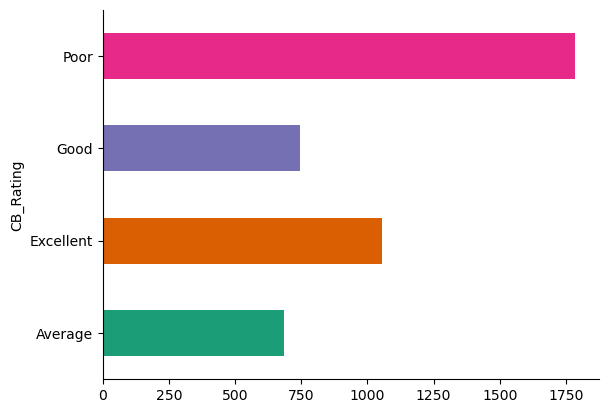

In [20]:
# @title CB_Rating

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('CB_Rating').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Exploratory Data Analysis

### Customer Segmentation

In [21]:
#Grouping customers according to income levels

income = df['Income levels'].value_counts().reset_index()

Income = income.rename(columns={'count':'Number of Applicants'})

Income

,Income levels,Number of Applicants
0,Upper Middle,1548
1,Lower Middle,1284
2,High,1047
3,Low,390


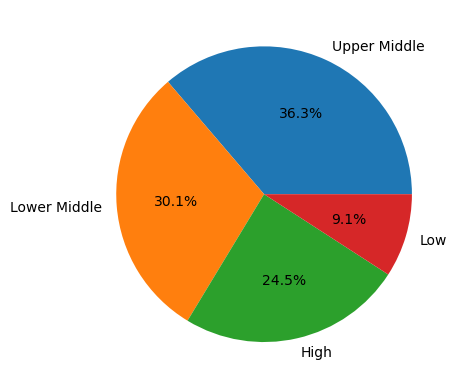

In [22]:
#plotting a pie chart

plt.pie(Income['Number of Applicants'], labels=Income['Income levels'], autopct='%1.1f%%')
plt.show()

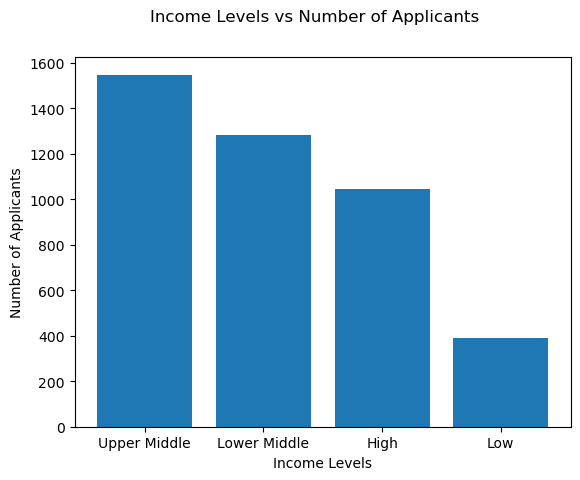

In [23]:
plt.bar(Income['Income levels'],Income['Number of Applicants'])

plt.suptitle('Income Levels vs Number of Applicants')
plt.xlabel('Income Levels')
plt.ylabel('Number of Applicants')
plt.show()

### Loan Rating

In [24]:
loan_rating = df['Loan Rating'].value_counts().reset_index()
loan_rating = loan_rating.rename(columns={'count':'Number of Applicants'})

loan_rating.head()

,Loan Rating,Number of Applicants
0,Silver,1564
1,Bronze,1425
2,Gold,1015
3,Platinum,265


### Graduated or Not

In [25]:
education = df['education'].value_counts().reset_index()
education = education.rename(columns={'count':'Number of Applicants'})

education.head()

,education,Number of Applicants
0,Graduate,2144
1,Not Graduate,2125


### Loan Range

In [26]:
loan_range = df['Loan Range'].value_counts().reset_index()

loan_range

,Loan Range,count
0,Intermediate,1683
1,Short Term,1341
2,Long Term,1245


### Number of Employed or Not

In [27]:
employment = df['self_employed'].value_counts().reset_index()

eployment = employment.rename(columns={'count':'Number of Applicants'})
eployment

,self_employed,Number of Applicants
0,Yes,2150
1,No,2119


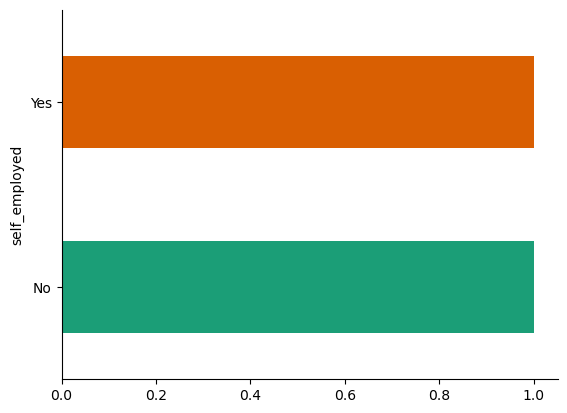

In [28]:
# @title self_employed

from matplotlib import pyplot as plt
import seaborn as sns
eployment.groupby('self_employed').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# Rate of Loan Approvals

## Overall Rate

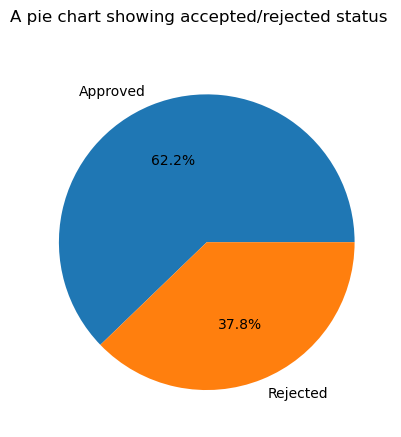

In [29]:
loan = df['loan_status'].value_counts().reset_index()

loans = loan.rename(columns={'count':'Number of Applicants'})

loans

plt.pie(loans['Number of Applicants'],labels=loans['loan_status'],autopct='%1.1f%%')
plt.suptitle('A pie chart showing accepted/rejected status')

plt.show()

In [30]:
#loan approvals according to education

education = df.groupby(['education','loan_status']).size().reset_index()

#filter to include rejected and approved
education = education[education['loan_status'].isin(['Approved','Rejected'])]

education

,education,loan_status,0
0,Graduate,Approved,1339
1,Graduate,Rejected,805
2,Not Graduate,Approved,1317
3,Not Graduate,Rejected,808


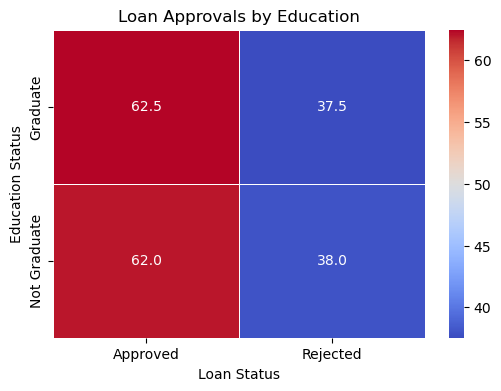

In [31]:
#create a pivot table

pivot_table = education.pivot(index='education',columns='loan_status',values=0)
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals,axis=0) * 100

#create a heat map
plt.figure(figsize = (6,4))

sns.heatmap(percentage, annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#labeling the heatmap
plt.title('Loan Approvals by Education')
plt.xlabel('Loan Status')
plt.ylabel('Education Status')

plt.show()

In [32]:
#loan apprrovals according to employment

employment_type = df.groupby(['self_employed','loan_status']).size().reset_index()

employment_type = employment_type[employment_type['loan_status'].isin(['Approved','Rejected'])]

employment_type = employment_type.rename(columns = {0:'Total'})

employment_type

,self_employed,loan_status,Total
0,No,Approved,1318
1,No,Rejected,801
2,Yes,Approved,1338
3,Yes,Rejected,812


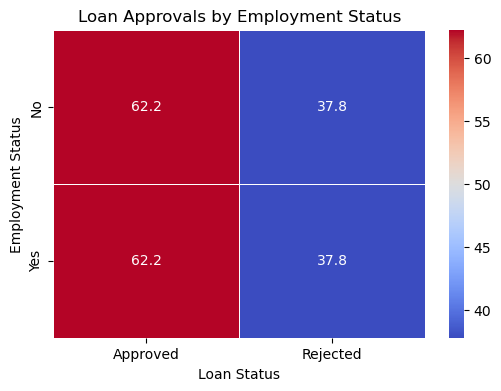

In [33]:
pivot_table = employment_type.pivot(index='self_employed',columns='loan_status',values='Total')
row_totals = pivot_table.sum(axis=1)
percentage = pivot_table.div(row_totals,axis=0) * 100

#create a heat map
plt.figure(figsize = (6,4))

sns.heatmap(percentage, annot=True,fmt='.1f',cmap='coolwarm',linewidth=0.5)

#labeling the heatmap
plt.title('Loan Approvals by Employment Status')
plt.xlabel('Loan Status')
plt.ylabel('Employment Status')

plt.show()

### Loan Approval by CIBIL Rating

In [34]:
#group data according to CIBIL Rating

cibil_rates = df.groupby(['CB_Rating','loan_status']).size().reset_index()

cibil_rates = cibil_rates.rename(columns={0:'Totals'})


cibil_rates

,CB_Rating,loan_status,Totals
0,Average,Approved,681
1,Average,Rejected,2
2,Excellent,Approved,1050
3,Excellent,Rejected,6
4,Good,Approved,740
5,Good,Rejected,5
6,Poor,Approved,185
7,Poor,Rejected,1600


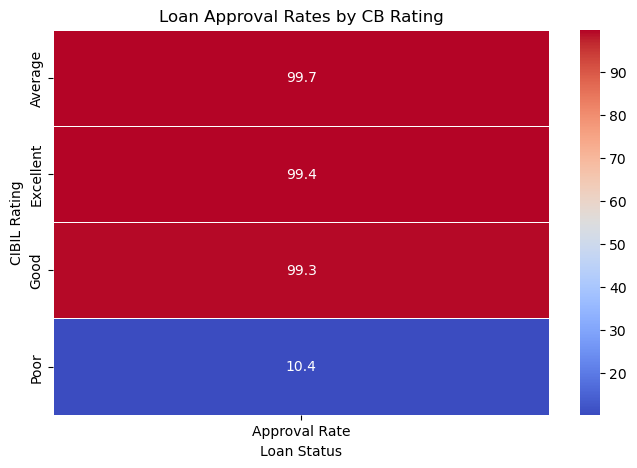

In [35]:
#pivot table
pivot_table = cibil_rates.pivot_table(index='CB_Rating',columns='loan_status',values = 'Totals')

#calculating the approval rates
pivot_table['Approval Rate'] = pivot_table['Approved']/(pivot_table['Approved'] + pivot_table['Rejected']) * 100


#create a heatmap
plt.figure(figsize=(8,5))
sns.heatmap(pivot_table[['Approval Rate']],annot=True, fmt='.1f',cmap='coolwarm',linewidth=0.5)

plt.title('Loan Approval Rates by CB Rating')
plt.xlabel('Loan Status')
plt.ylabel('CIBIL Rating')

plt.show()

# Correlation Analysis

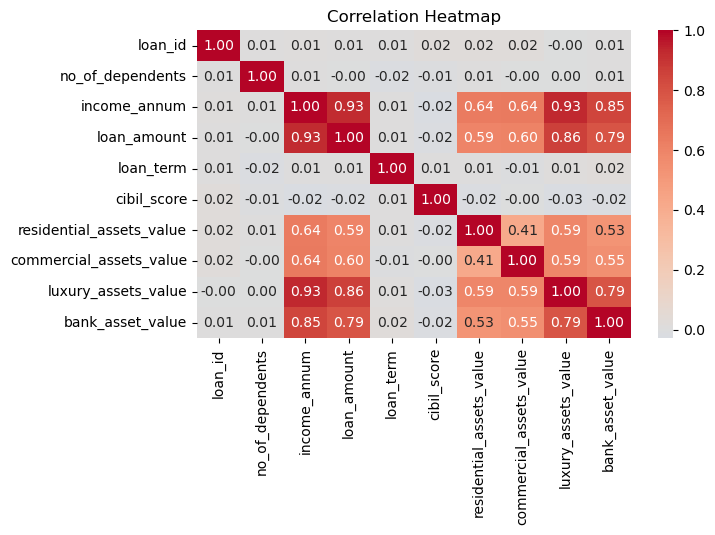

In [36]:
corr = df.corr(numeric_only=True)

#create a heatmap
plt.figure(figsize=(7,4))
sns.heatmap(corr, annot=True,cmap='coolwarm',center=0,fmt='.2f')
plt.title('Correlation Heatmap')

plt.show()

In [37]:
#correlation between asset value and income
assets = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
income = 'income_annum'

#calculate the correlation (Pearson Correlation)
correlations = df[assets + [income]].corr()

correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,income_annum
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.636824
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.640328
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.929145
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.851093
income_annum,0.636824,0.640328,0.929145,0.851093,1.000000


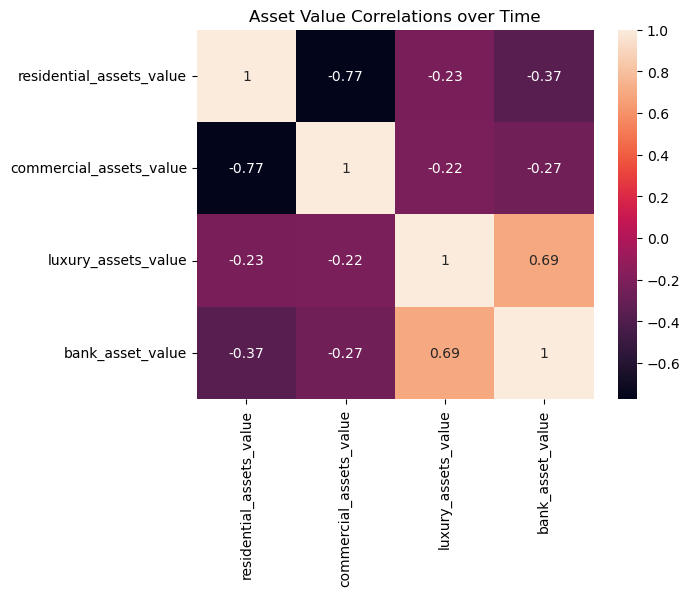

In [38]:
# @title Asset Value Correlations over Time

import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = correlations[['residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value']].corr()
sns.heatmap(corr_matrix, annot=True)
_ = plt.title('Asset Value Correlations over Time')

In [39]:
#correlation between asset value and income

assets = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']
loan = 'loan_amount'

#calculate the correlation (Pearson Correlation)
correlations = df[assets + [loan]].corr()

correlations

,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_amount
residential_assets_value,1.000000,0.414799,0.590919,0.527401,0.594582
commercial_assets_value,0.414799,1.000000,0.591128,0.548576,0.603188
luxury_assets_value,0.590919,0.591128,1.000000,0.788517,0.860914
bank_asset_value,0.527401,0.548576,0.788517,1.000000,0.788122
loan_amount,0.594582,0.603188,0.860914,0.788122,1.000000


# Asset Value Impact/Influence on Loan Approval

In [40]:
#importing machine learning models
from scipy import stats
from scipy.stats import f_oneway #ANOVA Analysis
from scipy.stats import ttest_ind #Conducting a t-test
from scipy.stats import chi2_contingency #Chi-Square Analysis

In [41]:
#split data into two groups based on loan status
approved = df[df ['loan_status'] == 'Approved']
rejected = df[df['loan_status'] == 'Rejected']

#Perform a t-test
assets = ['residential_assets_value','commercial_assets_value','luxury_assets_value','bank_asset_value']

for columns in assets:
    t_stat,p_value = ttest_ind(approved[columns],rejected[columns],equal_var=False)
    print(f"T-Test for {columns}:")
    print(f"T-Statistic: {t_stat}")
    print(f"P-Value: {p_value}")
    if p_value < 0.05:
        print(f"The difference in {columns} between approved & rejected loans statistically significant")
    else:
        print(f"The difference in {columns} between approved & rejected loans is not statistically significant")


T-Test for residential_assets_value:
T-Statistic: -0.9399394365500209
P-Value: 0.34731539500224484
The difference in residential_assets_value between approved & rejected loans is not statistically significant
T-Test for commercial_assets_value:
T-Statistic: 0.5387741456120381
P-Value: 0.5900779272018964
The difference in commercial_assets_value between approved & rejected loans is not statistically significant
T-Test for luxury_assets_value:
T-Statistic: -1.013970039592796
P-Value: 0.3106683217824068
The difference in luxury_assets_value between approved & rejected loans is not statistically significant
T-Test for bank_asset_value:
T-Statistic: -0.4448616890142232
P-Value: 0.6564475917396153
The difference in bank_asset_value between approved & rejected loans is not statistically significant


# ANOVA Analysis Correlation Between Income and Asset Value

In [42]:
#null hypothesis: There is no relation (significant difference) between assests value and income
#alternative hypothesis : There exists a relation (significant difference) between asset value and income


#extracting values in columns
residential_assets = df['residential_assets_value']
commercial_assets = df['commercial_assets_value']
luxury_assests = df['luxury_assets_value']
bank_assets = df['bank_asset_value']
income = df['income_annum']

# perform ANOVA

f_statistic,p_value = f_oneway(residential_assets,commercial_assets,luxury_assests,bank_assets,income)

print('The f statistics:',f_statistic)
print('The p statistics:',p_value)


if p_value < 0.05:
    print('There exists a relation (significant difference) between asset value and income')
else:
    print('There is no relation (significant difference) between assests value and income')


The f statistics: 2518.654468935116
The p statistics: 0.0
There exists a relation (significant difference) between asset value and income


## Correlation Between Income and Loan Amount

In [43]:
#null hypothesis: There is no relation (significant difference) between loan amount and income
#alternative hypothesis : There exists a relation (significant difference) between loan amount and income

income = df['income_annum']
loan = df['loan_amount']


#perform an independ t-test
t_stat,p_value = ttest_ind(income,loan,equal_var=True)

print('The T-statistics:',t_stat)
print('The P_value is :',p_value)

if p_value < 0.05:
    print('Accept the Hypothesis')
else:
    print('Reject the Null Hypothesis')


The T-statistics: -69.51489699866843
The P_value is : 0.0
Accept the Hypothesis


### Box plot

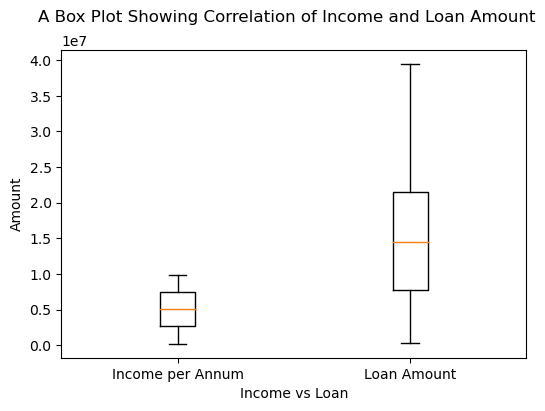

In [44]:
income = df['income_annum']
loan = df['loan_amount']

#plot
plt.figure(figsize=(6,4))
ax = plt.axes()

ax.boxplot([income,loan],labels=['Income per Annum','Loan Amount'])

plt.suptitle('A Box Plot Showing Correlation of Income and Loan Amount')
plt.ylabel('Amount')
plt.xlabel('Income vs Loan')

plt.show()

# Chi-Square Analysis : Correlation Between the Loan Status and Number of dependants

In [45]:
contingency_table = pd.crosstab(df['loan_status'],df['Number of Dependents'])

#perform chi-square
chi2,p_value,dof,expected = stats.chi2_contingency(contingency_table)

print('Chi-Square t-test:',chi2)
print('The P_Value is:',p_value)
print('The dof is:',dof)

if p_value < 0.05:
    print('There significanc relationship between loan status and the number of dependents')
else:
    print('There is not significance relationship between loan status and the number of dependents')

Chi-Square t-test: 1.1296798036848839
The P_Value is: 0.5684511474541935
The dof is: 2
There is not significance relationship between loan status and the number of dependents


# Logistic Regression

In [46]:
#changing categorical column to numeric

def edu_status(status):
    if status == 'Graduate':
        return 1
    elif status == 'Not Graduate':
        return 0
    else:
        return 'error'

df['Education Status'] = df['education'].apply(edu_status)

def employ_type(employ):
    if employ == 'Yes':
        return 1
    if employ == 'No':
        return 0

df['Employment Type'] = df['self_employed'].apply(employ_type)


def loan_approval(status):
    if status == 'Approved':
        return 1
    if status == 'Rejected':
        return 0

df['Loan Approval'] = df['loan_status'].apply(loan_approval)

df.head(10)

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,...,bank_asset_value,loan_status,CB_Rating,Income levels,Loan Rating,Loan Range,Number of Dependents,Education Status,Employment Type,Loan Approval
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,...,8000000,Approved,Excellent,High,Gold,Intermediate,Moderate,1,0,1
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,...,3300000,Rejected,Poor,Upper Middle,Silver,Intermediate,Low,0,1,0
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,...,12800000,Rejected,Poor,High,Gold,Long Term,Moderate,1,0,0
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,...,7900000,Rejected,Poor,High,Platinum,Intermediate,Moderate,1,0,0
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,...,5000000,Rejected,Poor,High,Gold,Long Term,High,0,1,0
5,6,0,Graduate,Yes,4800000,13500000,10,319,6800000,8300000,...,5100000,Rejected,Poor,Upper Middle,Silver,Intermediate,Low,1,1,0
6,7,5,Graduate,No,8700000,33000000,4,678,22500000,14800000,...,4300000,Approved,Good,High,Platinum,Short Term,High,1,0,1
7,8,2,Graduate,Yes,5700000,15000000,20,382,13200000,5700000,...,6000000,Rejected,Poor,Upper Middle,Silver,Long Term,Moderate,1,1,0
8,9,0,Graduate,Yes,800000,2200000,20,782,1300000,800000,...,600000,Approved,Excellent,Low,Bronze,Long Term,Low,1,1,1
9,10,5,Not Graduate,No,1100000,4300000,10,388,3200000,1400000,...,1600000,Rejected,Poor,Lower Middle,Bronze,Intermediate,High,0,0,0


In [47]:
#separate the values and define X

X = df.drop(columns={'loan_id','CB_Rating','Income levels','Loan Rating','loan_status','Loan Range','Number of Dependents','Education Status','Employment Type','Loan Approval','education','self_employed'})

X

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,2,9600000,29900000,12,778,2400000,17600000,22700000,8000000
1,0,4100000,12200000,8,417,2700000,2200000,8800000,3300000
2,3,9100000,29700000,20,506,7100000,4500000,33300000,12800000
3,3,8200000,30700000,8,467,18200000,3300000,23300000,7900000
4,5,9800000,24200000,20,382,12400000,8200000,29400000,5000000
...,...,...,...,...,...,...,...,...,...
4264,5,1000000,2300000,12,317,2800000,500000,3300000,800000
4265,0,3300000,11300000,20,559,4200000,2900000,11000000,1900000
4266,2,6500000,23900000,18,457,1200000,12400000,18100000,7300000
4267,1,4100000,12800000,8,780,8200000,700000,14100000,5800000


In [48]:
#defining y-axis

y = df['Loan Approval']

y.head()

0    1
1    0
2    0
3    0
4    0
Name: Loan Approval, dtype: int64

## Obote's Collaborations

Before we move on, let's take a look at the **distribution of observations** between the two classes.
**Approved** and **Rejected**

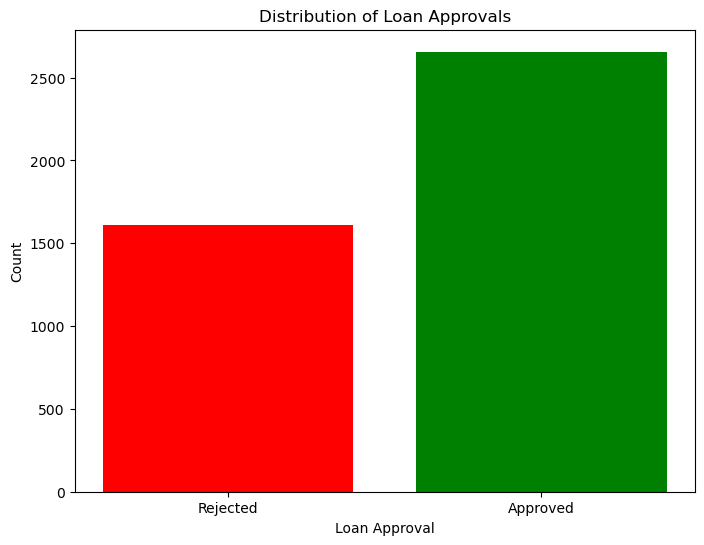

In [49]:
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['Loan Approval'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
plt.bar(class_counts.index, class_counts.values, color=['green', 'red'])
plt.xlabel('Loan Approval')
plt.ylabel('Count')
plt.title('Distribution of Loan Approvals')
plt.xticks(class_counts.index, ['Approved', 'Rejected'])
plt.show()


*To balance the data before training the model, you can use resampling techniques such as oversampling or undersampling.*

Here's how you can do it:

- Oversampling: In oversampling, you create additional samples in the minority class (in this case, the rejected loan approvals) to balance the class distribution. You can achieve this by randomly duplicating samples from the minority class until it reaches the same size as the majority class.
- Undersampling: In undersampling, you reduce the number of samples in the majority class (in this case, the approved loan approvals) to match the size of the minority class. This is typically done by randomly removing samples from the majority class.

You can use imblearn or sklearn

- sklearn to balance the data instead of imbalanced-learn (imblearn). While imblearn provides specific methods for resampling techniques to deal with imbalanced datasets, sklearn also offers similar functionality for data preprocessing and resampling.




In [61]:
# Please install the packages if you dont have them, you can comment the statement if you have them
# !pip install --upgrade scikit-learn
# !pip install --upgrade imbalanced-learn




After resampling, you can train your logistic regression model on the resampled data and evaluate its performance.

In [50]:
#importing the regression mode libraries

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#splitting the data set, test and validation
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=18)


#scaling data
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

X_train_scaled



array([[ 0.89461517,  1.47939784,  1.25521771, ..., -1.03901496,
         1.30942448,  0.10792223],
       [ 1.4840551 , -0.97470328, -1.04731936, ..., -0.69464869,
        -0.70841069, -0.75044885],
       [-1.46314458, -0.76130318, -0.47443932, ..., -1.08493047,
        -0.48788226, -0.87307329],
       ...,
       [-1.46314458,  1.05259765,  1.75097928, ...,  1.05014041,
         1.60713787,  0.23054667],
       [-0.87370465,  1.19486438,  1.04589616, ...,  1.87661945,
         1.79458704,  0.99694942],
       [ 1.4840551 , -0.58346977, -0.25410085, ..., -0.14366266,
        -0.44377657, -0.10667054]])

In [51]:
X_test_scaled

array([[ 0.27340087, -0.68093237, -0.41251494, ..., -0.62391112,
        -0.54090263, -0.57254697],
       [ 0.86400208, -1.25357268, -1.12674748, ..., -0.96010821,
        -1.11848874, -0.97624858],
       [ 0.27340087, -1.61147288, -1.50618352, ..., -1.11700019,
        -1.44542427, -1.41100416],
       ...,
       [ 0.27340087,  1.03698858,  1.02711002, ...,  0.07089621,
         0.57067818,  2.03598651],
       [ 0.27340087,  1.0727786 ,  0.71463328, ..., -0.31012716,
         0.16745769,  1.50806902],
       [-0.31720034, -0.14408207, -0.30091611, ...,  0.27261446,
        -0.57359618,  0.11064037]])

In [52]:
#Training and predict the model

model = LogisticRegression(random_state=0).fit(X_train_scaled,y_train)
predict = model.predict(X_train_scaled)

print(predict)

[1 1 1 ... 1 1 1]


In [53]:
#accuracy
model.score(X_train_scaled,y_train)

0.9170013386880856

In [54]:
# Accurancy of the new dataset
model.score(X_test_scaled,y_test)

0.921935987509758

## Our model attained a accurancy of 92!